In [24]:
import os,numpy as np,pandas as pd,math,matplotlib.pyplot as plt,random 

#=================================FUNCTIONS==========================================

def sigmoid(z):
    return 1 / (1 + math.exp(-z))


vSigmoid = np.vectorize(sigmoid) # functions take a vector and apply sigmoid on each element


def error(Y,A):
        logA = np.log10(A)
        A_1 = 1 - A  # (1-a)
        logA_1 = np.log10(A_1)
        Y_1 = 1 - Y # (1-y)
        
        e =-(Y*logA + (Y_1)*(logA_1))
        return np.sum(e)/958
    

    

In [40]:
dir = "data"
file = "TicTacToeData.csv"

filename = os.path.join(dir,file)
columns = ['TL','TM','TR','ML','MM','MR','BL','BM','BR','Result']

df = pd.read_csv(filename, names = columns) #b = 0.21 (blank) x = 0.22 (player x) o = 0.23 (player o)
df = df.sample(frac=1).reset_index(drop=True) #shuffling rows
    
    
X = df[['TL','TM','TR','ML','MM','MR','BL','BM','BR']].as_matrix() #features values


X = X.T
 
m = X.shape[1] # Number of data points

Y = np.array([df['Result']]) # Ground Truth (for player x win)

a = 0.00001 # Alpha


# FORWARD PASS

# Layer 0 (Features)

In [15]:


#=========================OUTPUT OF LAYER 0 ============================
#Layer 0 contains our features

A0 = X





# Layer 1

In [16]:

#Number of Nodes 9
#Input of layer 1 is A0 (Output of layer 0)

W1 = np.random.rand(9,9)
b1 = np.random.rand(9,1)


Z1 = np.dot(W1,A0) #Multiping thetas of all nodes of layer 1 with all data instances
Z1 = np.add(Z1,b1) #Broadcasting bais of all nodes of layer 1 

A1 = np.apply_along_axis(vSigmoid, 0, Z1)  # applying sigmoid on each coloumn 

# Layer 2

In [26]:
# Number of Nodes 1
#Input of layer 2 is A1 (Output of layer 1)

W2 = np.random.rand(1,9)
b2 = np.random.rand()

Z2 = np.dot(W2,A1) #Multiping thetas of all nodes of layer 2 with all data instances
Z2 = np.add(Z2,b2) #Broadcasting bais of all nodes of layer 2 

A2 = np.apply_along_axis(vSigmoid, 0, Z2)  # applying sigmoid on each coloumn 



# BACK PROPAGATION

# Layer 2

In [6]:
dz2 = A2 - Y

dw2 = np.dot(dz2,A1.T)/m

db2 = np.sum(dz2,axis = 1, keepdims = True) / m



# Layer 1

In [7]:
dg1 = ((np.apply_along_axis(vSigmoid, 0, Z1))*(1 - np.apply_along_axis(vSigmoid, 0, Z1)))
dz1 = np.dot(W2.T,dz2) * dg1

dw1 = np.dot(dz1,X.T)/m
db1 = np.sum(dz1,axis = 1,keepdims = True)/m


# UPDATING THETAS

# Layer 1

In [8]:
W1 = W1 - (a * dw1)
b1 = b1 - (a * db1)


# Layer 2

In [ ]:
W2 = W2 - (a * dw2)
b2 = b2 - (a * db2)

# Main Function

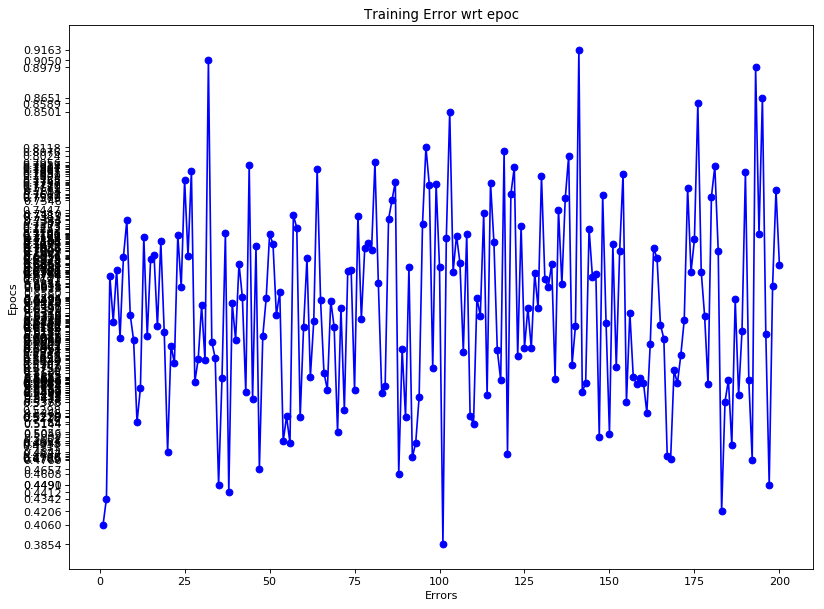

In [59]:
epoc = 0
epocs = []
gradient = 100
maxGradient1 = 0
maxGradient2 = 0
errors = []

while epoc < 200:  # and gradient > 0.01 epoc < 200 and 
    #=========================OUTPUT OF LAYER 0 ============================
    #Layer 0 contains our features

    A0 = X


    #Number of Nodes 9
    #Input of layer 1 is A0 (Output of layer 0)

    W1 = np.random.rand(9,9)
    b1 = np.random.rand(9,1)


    Z1 = np.dot(W1,A0) #Multiping thetas of all nodes of layer 1 with all data instances
    Z1 = np.add(Z1,b1) #Broadcasting bais of all nodes of layer 1 

    A1 = np.apply_along_axis(vSigmoid, 0, Z1)  # applying sigmoid on each coloumn 

    # Number of Nodes 1
    #Input of layer 2 is A1 (Output of layer 1)

    W2 = np.random.rand(1,9)
    b2 = np.random.rand()

    Z2 = np.dot(W2,A1) #Multiping thetas of all nodes of layer 2 with all data instances
    Z2 = np.add(Z2,b2) #Broadcasting bais of all nodes of layer 2 

    A2 = np.apply_along_axis(vSigmoid, 0, Z2)  # applying sigmoid on each coloumn 
    
    errors.append(error(Y,A2))
    
    #BackPropagation
    #Layer 2
    dz2 = A2 - Y

    dw2 = np.dot(dz2,A1.T)/m

    db2 = np.sum(dz2,axis = 1, keepdims = True) / m
    
    #Layer 1
    dg1 = ((np.apply_along_axis(vSigmoid, 0, Z1))*(1 - np.apply_along_axis(vSigmoid, 0, Z1)))
    dz1 = np.dot(W2.T,dz2) * dg1

    dw1 = np.dot(dz1,X.T)/m
    db1 = np.sum(dz1,axis = 1,keepdims = True)/m

    #UPDATING THETAS
    #layer 1
    W1 = W1 - (a * dw1)
    b1 = b1 - (a * db1)
    
    #layer 2
    W2 = W2 - (a * dw2)
    b2 = b2 - (a * db2)

    #finding max gradient in both layers
    
    minGradient1 = np.amax(dw1)
    minGradient2 = np.amax(dw2)
    gradient = min([minGradient1,minGradient2])
    epoc = epoc + 1
    epocs.append(epoc)
    

plt.figure(num=None, figsize=(12, 9), dpi=80)
plt.plot(epocs, errors,'-bo')
plt.title("Training Error wrt epoc")
plt.xlabel("Errors")
plt.ylabel("Epocs")
plt.yticks(errors)
plt.show()
    
